In [1]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 27.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 125.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [12]:
!unzip ./data/Cat.zip
!mv ResizedCat Cat



^C


"mv" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [10]:
!unzip ./data/Dog.zip
!mv ResizedDog Dog

Archive:  ../data/Dog.zip
 extracting: ResizedDog/image0000.jpg  
 extracting: ResizedDog/image0001.jpg  
 extracting: ResizedDog/image0002.jpg  
 extracting: ResizedDog/image0003.jpg  
 extracting: ResizedDog/image0004.jpg  
 extracting: ResizedDog/image0005.jpg  
 extracting: ResizedDog/image0006.jpg  
 extracting: ResizedDog/image0007.jpg  
 extracting: ResizedDog/image0008.jpg  
 extracting: ResizedDog/image0009.jpg  
 extracting: ResizedDog/image0010.jpg  
 extracting: ResizedDog/image0011.jpg  
 extracting: ResizedDog/image0012.jpg  
 extracting: ResizedDog/image0013.jpg  
 extracting: ResizedDog/image0014.jpg  
 extracting: ResizedDog/image0015.jpg  
 extracting: ResizedDog/image0016.jpg  
 extracting: ResizedDog/image0017.jpg  
 extracting: ResizedDog/image0018.jpg  
 extracting: ResizedDog/image0019.jpg  
 extracting: ResizedDog/image0020.jpg  
 extracting: ResizedDog/image0021.jpg  
 extracting: ResizedDog/image0022.jpg  
 extracting: ResizedDog/image0023.jpg  
 extracting: R

In [2]:
!pip install --upgrade pip
!pip install pandas numpy matplotlib scikit-learn

In [3]:
!Pip install tensorflow

In [4]:
# Step 0. Load libraries and custom modules
# System --------------------------------------------------------
import os
import pathlib
# Dataframes and matrices ---------------------------------------
import numpy as np
import pandas as pd
# Graphics ------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Machine learning ----------------------------------------------
from sklearn.model_selection import train_test_split
# Deep learning -------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import get_file
from keras.utils import image_dataset_from_directory

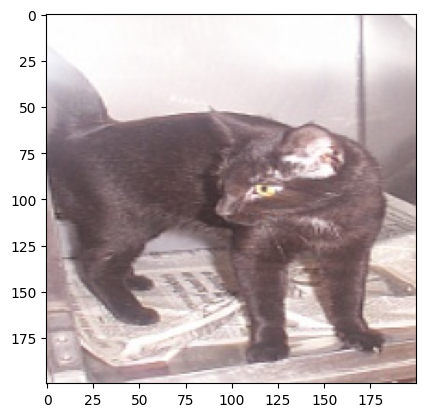

In [5]:
# Sample a cat image/workspace/REDES-NEURONALES-EN-CLASE/data/Cat
sample_cat = mpimg.imread('./Pets/Cat/image3814.jpg')
plt.imshow(sample_cat)
plt.show()

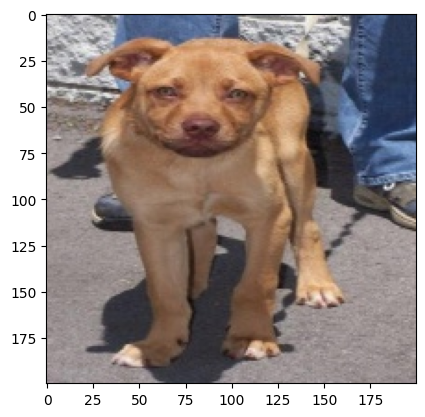

In [6]:
# Sample a dog image
sample_dog = mpimg.imread('./Pets/Dog/image8941.jpg')
plt.imshow(sample_dog)
plt.show()

In [7]:
# Count total images
data_dir = pathlib.Path('./Pets')
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

24946

In [8]:
# Let's follow this tutorial: https://www.tensorflow.org/tutorials/load_data/images
# Create train dataset
IMAGE_WITDH = 200
IMAGE_HEIGHT = 200
BATCH_SIZE = 32 #lote
# etiqueta todas las imagenes dentro de una carpeta quedan etiquetadas con el nombre de la carpeta
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMAGE_WITDH,IMAGE_HEIGHT),
  batch_size=BATCH_SIZE)

  #los dataset los vamos a dividir en tres bloques, aprendizaje, validacion, test


Found 24946 files belonging to 2 classes.
Using 19957 files for training.


In [9]:
# Create validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMAGE_WITDH,IMAGE_HEIGHT),
  batch_size=BATCH_SIZE)

Found 24946 files belonging to 2 classes.
Using 4989 files for validation.


In [10]:
# Read the classes
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog']


In [11]:
# Create the deep learning architecture: secuencia de pasos que va a seguir la red neuronal
# una arquitectura recomendada es resnet

#https://medium.com/analytics-vidhya/understanding-resnet-architecture-869915cc2a98
#https://towardsdatascience.com/review-squeezenet-image-classification-e7414825581a
#https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/
#kernel 32, stride 3,3 (cuantos bloques va a saltar el kernel(lote)) (32, (3, 3)

#relu
#sigmoid
#tanh

# las imagenes a color tienen 3 constantes rgb (channels) 
IMAGE_CHANNELS=3
IMAGE_WIDTH=200
IMAGE_HEIGHT=200

model = Sequential([

Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Flatten(),
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(1, activation='sigmoid'), # 2 because we have cat and dog classes
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 97, 97, 64)       2

In [12]:
# Fit the model
#history=model.fit(train_ds, validation_data=val_ds, epochs=7)
model.fit(train_ds, validation_data=val_ds, epochs=3)

Epoch 1/10
624/624 [==============================] - 1739s 3s/step - loss: 0.6931 - accuracy: 0.6538 - val_loss: 0.5515 - val_accuracy: 0.7180
Epoch 2/10
624/624 [==============================] - 1478s 2s/step - loss: 0.5079 - accuracy: 0.7460 - val_loss: 0.4727 - val_accuracy: 0.7787
Epoch 3/10
624/624 [==============================] - 1435s 2s/step - loss: 0.4792 - accuracy: 0.7694 - val_loss: 0.4584 - val_accuracy: 0.7855
Epoch 4/10
624/624 [==============================] - 1802s 3s/step - loss: 0.4305 - accuracy: 0.7986 - val_loss: 0.4646 - val_accuracy: 0.7837
Epoch 5/10
624/624 [==============================] - 2036s 3s/step - loss: 0.3816 - accuracy: 0.8276 - val_loss: 0.4470 - val_accuracy: 0.8002
Epoch 6/10
624/624 [==============================] - 2042s 3s/step - loss: 0.3180 - accuracy: 0.8620 - val_loss: 0.4809 - val_accuracy: 0.7972
Epoch 7/10
624/624 [==============================] - 2002s 3s/step - loss: 0.3126 - accuracy: 0.8652 - val_loss: 0.5999 - val_accuracy:

In [ ]:
# saved the model from disk
from tensorflow.keras.models import save_model
filename = './catdog_Model.h5'
save_model(model, filename)

In [ ]:
# Guardar el Modelo
#import pickle 
#filename = './models/image-classifire-cat-and-dog_Model.pickle'
#pickle.dump(history, open(filename,'wb'))

In [17]:
def load_img(filename):
    img = cv2.imread(filename)
    try:
        img_resized = cv2.resize(img,(200,200))
    except:
        print(f'Error in image {img}')
    return img_resized

In [ ]:
from keras.preprocessing import image
img = tf.keras.utils.load_img("./cute_dog.jpg")
img = np.asarray(img)
plt.imshow(img)

In [ ]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from keras.models import load_model

filename = './catdog_Model.h5'
img = tf.keras.utils.load_img("./cute_dog.jpg")
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
saved_model= load_model(filename)
output =saved_model.predict(img)

if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')
    


In [ ]:
# load the model from disk
#filename = './models/image-classifire-cat-and-dog_Model.pickle'
#loaded_model = pickle.load(open(filename, 'rb'))